In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import pyarrow.feather as feather

In [3]:
# replace this with the combined dataframe

df = pd.read_csv("data/14096681/data/ACCESS-CM2_daily_rainfall_NSW.csv")
df2 = pd.read_csv("data/14096681/data/GFDL-CM4_daily_rainfall_NSW.csv")
df3 = pd.read_csv("data/14096681/data/observed_daily_rainfall_SYD.csv")

In [4]:
# add a column called model

df["model"] = "ACCESS-CM2_daily_rainfall_NSW"
df2["model"] = "GFDL-CM4_daily_rainfall_NSW"
df3["model"] = "observed_daily_rainfall_SYD"

In [5]:
df3

,time,rain (mm/day),model
0,1889-01-01,0.006612,observed_daily_rainfall_SYD
1,1889-01-02,0.090422,observed_daily_rainfall_SYD
2,1889-01-03,1.401452,observed_daily_rainfall_SYD
3,1889-01-04,14.869798,observed_daily_rainfall_SYD
4,1889-01-05,0.467628,observed_daily_rainfall_SYD
...,...,...,...
46015,2014-12-27,0.037472,observed_daily_rainfall_SYD
46016,2014-12-28,0.158061,observed_daily_rainfall_SYD
46017,2014-12-29,0.025719,observed_daily_rainfall_SYD
46018,2014-12-30,0.729390,observed_daily_rainfall_SYD


In [6]:
# merge dataframes 

merge = pd.concat([df, df2, df3])

In [7]:
# final merged dataframe 

merge

,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,3.293256e-13,ACCESS-CM2_daily_rainfall_NSW
1,1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
2,1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
3,1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
4,1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,1.047658e-02,ACCESS-CM2_daily_rainfall_NSW
...,...,...,...,...,...,...,...
46015,2014-12-27,NaN,NaN,NaN,NaN,3.747200e-02,observed_daily_rainfall_SYD
46016,2014-12-28,NaN,NaN,NaN,NaN,1.580613e-01,observed_daily_rainfall_SYD
46017,2014-12-29,NaN,NaN,NaN,NaN,2.571914e-02,observed_daily_rainfall_SYD
46018,2014-12-30,NaN,NaN,NaN,NaN,7.293899e-01,observed_daily_rainfall_SYD


In [8]:
# write the dataframe to feather format 

feather.write_feather(merge, 'data/final_data.feather')

In [17]:
%%R

# transfer dataframe to R

library(tidyverse)
library(here)
library(feather)

file_path = here("data", "final_data.feather")

df <- arrow::read_feather(file_path)

In [18]:
%%R

df

# A tibble: 5,198,160 x 7
   time         lat_min lat_max lon_min lon_max `rain (mm/day)` model           
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>           
 1 1889-01-01 …   -36.2     -35    141.    142.        3.29e-13 ACCESS-CM2_dail…
 2 1889-01-02 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 3 1889-01-03 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 4 1889-01-04 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 5 1889-01-05 …   -36.2     -35    141.    142.        1.05e- 2 ACCESS-CM2_dail…
 6 1889-01-06 …   -36.2     -35    141.    142.        3.29e- 2 ACCESS-CM2_dail…
 7 1889-01-07 …   -36.2     -35    141.    142.        8.91e- 2 ACCESS-CM2_dail…
 8 1889-01-08 …   -36.2     -35    141.    142.        3.16e- 2 ACCESS-CM2_dail…
 9 1889-01-09 …   -36.2     -35    141.    142.        3.11e- 2 ACCESS-CM2_dail…
10 1889-01-10 …   -36.2     -35    141.    142.        3.30e- 2 ACCESS-CM2_dail…
# 

In [75]:
%%R

#total number of unique models will be larger once we have all of them 

unique(df$model)

[1] "ACCESS-CM2_daily_rainfall_NSW" "GFDL-CM4_daily_rainfall_NSW"  
[3] "observed_daily_rainfall_SYD"  


In [19]:
%%R

# rename the column 

df <- df %>% dplyr::rename("rainfall" = `rain (mm/day)`)

In [57]:
%%R

#library(lubridate)

#sam <- sample_n(df, 500)
#sam %>% filter(model == "observed_daily_rainfall_SYD") %>% select(time, model)

# A tibble: 6 x 2
  time       model                      
  <chr>      <chr>                      
1 1972-07-22 observed_daily_rainfall_SYD
2 1924-11-19 observed_daily_rainfall_SYD
3 1899-12-12 observed_daily_rainfall_SYD
4 1934-02-06 observed_daily_rainfall_SYD
5 1962-02-07 observed_daily_rainfall_SYD
6 1947-10-23 observed_daily_rainfall_SYD


In [13]:
%%R
#library(lubridate)


#df$time <- ymd_hms(df$time)
#glimpse(df)

Rows: 5,198,160
Columns: 7
$ time     <dttm> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ lat_min  <dbl> -36.25, -36.25, -36.25, -36.25, -36.25, -36.25, -36.25, -36.2…
$ lat_max  <dbl> -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -…
$ lon_min  <dbl> 140.625, 140.625, 140.625, 140.625, 140.625, 140.625, 140.625…
$ lon_max  <dbl> 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5…
$ rainfall <dbl> 3.293256e-13, 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.047…
$ model    <chr> "ACCESS-CM2_daily_rainfall_NSW", "ACCESS-CM2_daily_rainfall_N…


In [69]:
%%R
#df_2014 <- df %>% filter(time >='2014-01-01' & time <='2014-12-31')
#df_2014

# A tibble: 41,133 x 7
   time         lat_min lat_max lon_min lon_max `rain (mm/day)` model           
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>           
 1 2014-01-01 …   -36.2     -35    141.    142.        0.000158 ACCESS-CM2_dail…
 2 2014-01-02 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
 3 2014-01-03 …   -36.2     -35    141.    142.        0.372    ACCESS-CM2_dail…
 4 2014-01-04 …   -36.2     -35    141.    142.        0.0989   ACCESS-CM2_dail…
 5 2014-01-05 …   -36.2     -35    141.    142.        0.0656   ACCESS-CM2_dail…
 6 2014-01-06 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
 7 2014-01-07 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
 8 2014-01-08 …   -36.2     -35    141.    142.        0.0137   ACCESS-CM2_dail…
 9 2014-01-09 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
10 2014-01-10 …   -36.2     -35    141.    142.        0        ACCESS-CM2_dail…
# … w

In [20]:
%%R

# filter the data for 2014 to compare against one model 

df_2014 <- df %>% select(time, model, rainfall) %>% filter(time>='2014-01-01' & time<='2014-12-31', 
                         model == "ACCESS-CM2_daily_rainfall_NSW" | model == "observed_daily_rainfall_SYD")

df_2014

# A tibble: 15,653 x 3
   time                model                         rainfall
   <chr>               <chr>                            <dbl>
 1 2014-01-01 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0.000158
 2 2014-01-02 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0       
 3 2014-01-03 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0.372   
 4 2014-01-04 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0.0989  
 5 2014-01-05 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0.0656  
 6 2014-01-06 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0       
 7 2014-01-07 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0       
 8 2014-01-08 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0.0137  
 9 2014-01-09 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0       
10 2014-01-10 12:00:00 ACCESS-CM2_daily_rainfall_NSW 0       
# … with 15,643 more rows


In [21]:
%%R
first <- df_2014 %>% filter(model == "observed_daily_rainfall_SYD") %>% mutate(time = ymd(time))

In [22]:
%%R

second <- df_2014 %>% filter(model != "observed_daily_rainfall_SYD") %>% mutate(time = ymd_hms(time)) %>% mutate(time = format(time, format = "%Y-%m-%d"))

In [23]:
%%R
#different dates have to be parsed differently before being put together - need to come up with a better way to do this

final <- rbind(first, second)

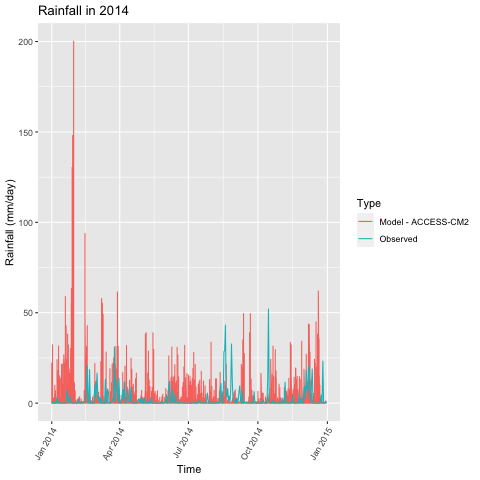

In [24]:
%%R

# compares one models predictions to the observed findings 

library(ggplot2)

rainfall <- ggplot(final, aes(x=time, y=rainfall)) +
    geom_line(aes(color = model)) + 
    theme(axis.text.x=element_text(angle=60, hjust=1)) +
    labs(title = "Rainfall in 2014", x = "Time", y = "Rainfall (mm/day)") +
    scale_color_discrete(name = "Type", labels = c("Model - ACCESS-CM2", "Observed"))

rainfall

In [138]:
%%R

#summary of the dataframe overall

apply(df, MARGIN=2, FUN=summary)

       time        lat_min     lat_max     lon_min     lon_max    
Length "5198160"   "5198160"   "5198160"   "5198160"   "5198160"  
Class  "character" "character" "character" "character" "character"
Mode   "character" "character" "character" "character" "character"
       rain (mm/day) model      
Length "5198160"     "5198160"  
Class  "character"   "character"
Mode   "character"   "character"


In [45]:
%%R

#make a copy of the dataframe and them parse the dates 

df_test <- data.frame(df)

if (!df_test$model == "observed_daily_rainfall_SYD"){
    df_test$time <- ymd_hms(df_test$time)
}

df_test <- df_test %>% mutate(year = year(df_test$time))

In [46]:
%%R
glimpse(df_test)

Rows: 5,198,160
Columns: 8
$ time     <dttm> 1889-01-01 12:00:00, 1889-01-02 12:00:00, 1889-01-03 12:00:0…
$ lat_min  <dbl> -36.25, -36.25, -36.25, -36.25, -36.25, -36.25, -36.25, -36.2…
$ lat_max  <dbl> -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -…
$ lon_min  <dbl> 140.625, 140.625, 140.625, 140.625, 140.625, 140.625, 140.625…
$ lon_max  <dbl> 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5…
$ rainfall <dbl> 3.293256e-13, 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.047…
$ model    <chr> "ACCESS-CM2_daily_rainfall_NSW", "ACCESS-CM2_daily_rainfall_N…
$ year     <dbl> 1889, 1889, 1889, 1889, 1889, 1889, 1889, 1889, 1889, 1889, 1…


`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


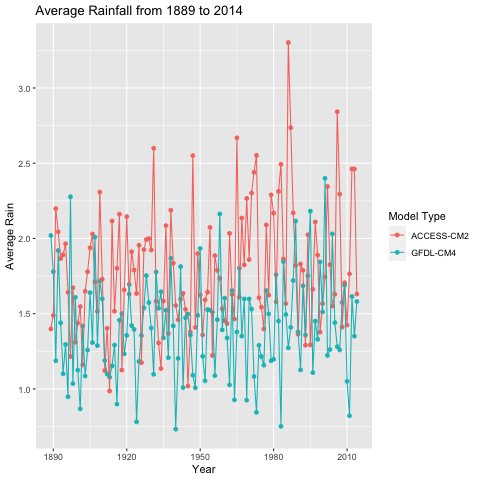

In [56]:
%%R

#comparing the average rain fall overtime for two selected models

avg <- df_test %>% filter(model == "ACCESS-CM2_daily_rainfall_NSW" | model == "GFDL-CM4_daily_rainfall_NSW") %>% group_by(year, model) %>% 
summarise(avg_rain = mean(rainfall))

avg


avg_rainfall <- ggplot(avg, aes(x = year, y = avg_rain, color = model)) +
                geom_point() +
                geom_line() +
                labs(title = "Average Rainfall from 1889 to 2014", x = "Year", y = "Average Rain") +
                scale_color_discrete(name = "Model Type", labels = c("ACCESS-CM2", "GFDL-CM4"))
    
avg_rainfall

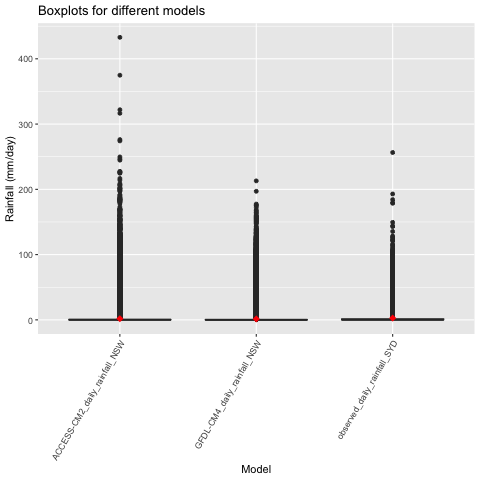

In [66]:
%%R

# boxplot for the different models with the mean highlighted

df_boxplot <- df %>% select(model, rainfall)

ggplot(df_boxplot, aes(x = model, y = rainfall)) +
geom_boxplot() +
stat_summary(fun=mean, colour="red", geom="point", 
               shape=18, size=3, show.legend=FALSE) +
theme(axis.text.x=element_text(angle=60, hjust=1)) +
labs(title = "Boxplots for different models", x = "Model", y = "Rainfall (mm/day)")

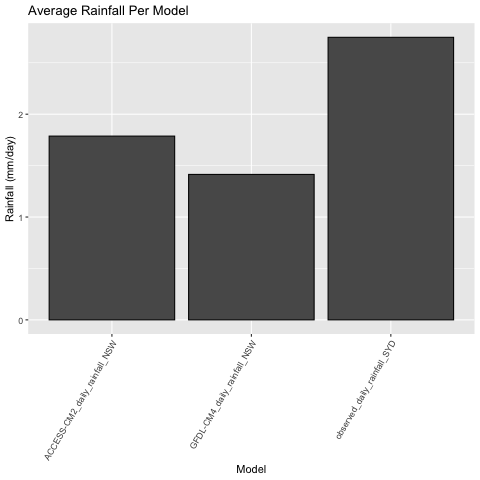

In [74]:
%%R

# plots the average rainfall without the outliers for all the models

df_errorbar <- df %>% select(model, rainfall) %>%
group_by(model) %>% summarise(avg_rain = mean(rainfall))

ggplot(df_errorbar, aes(x = model, y = avg_rain)) +
geom_bar(stat="identity", color="black", 
           position=position_dodge())+
theme(axis.text.x=element_text(angle=60, hjust=1)) +
labs(title = "Average Rainfall Per Model", x = "Model", y = "Rainfall (mm/day)")

In [70]:
%%R

unique(df$lat_min)

 [1] -36.25 -35.00 -33.75 -32.50 -31.25 -30.00 -36.00 -34.00 -33.00 -32.00
[11] -31.00     NA


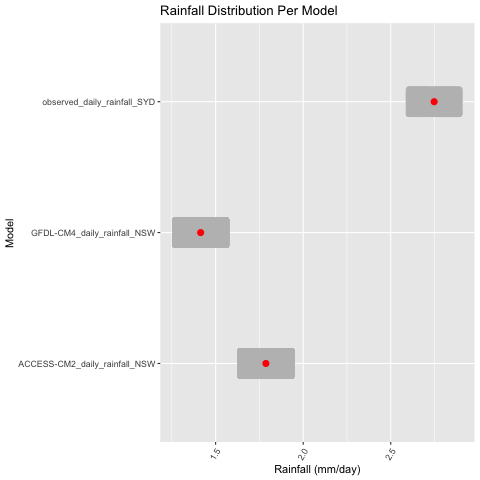

In [80]:
%%R

# plots the average rainfall as a jitterplot

df_jitter <- df %>% select(model, rainfall) %>%
group_by(model) %>% mutate(avg_rain = mean(rainfall))

ggplot(df_jitter, aes(y = model, x = avg_rain)) +
geom_jitter(alpha=0.1, height=0.1, color = "grey")+
theme(axis.text.x=element_text(angle=60, hjust=1)) +
geom_pointrange(stat = 'summary', fun.data = mean_cl_normal,
                        color = 'red') + 
labs(title = "Rainfall Distribution Per Model", y = "Model", x = "Rainfall (mm/day)")

In [92]:
%%R

df

# A tibble: 5,198,160 x 7
   time            lat_min lat_max lon_min lon_max rainfall model               
   <chr>             <dbl>   <dbl>   <dbl>   <dbl>    <dbl> <chr>               
 1 1889-01-01 12:…   -36.2     -35    141.    142. 3.29e-13 ACCESS-CM2_daily_ra…
 2 1889-01-02 12:…   -36.2     -35    141.    142. 0.       ACCESS-CM2_daily_ra…
 3 1889-01-03 12:…   -36.2     -35    141.    142. 0.       ACCESS-CM2_daily_ra…
 4 1889-01-04 12:…   -36.2     -35    141.    142. 0.       ACCESS-CM2_daily_ra…
 5 1889-01-05 12:…   -36.2     -35    141.    142. 1.05e- 2 ACCESS-CM2_daily_ra…
 6 1889-01-06 12:…   -36.2     -35    141.    142. 3.29e- 2 ACCESS-CM2_daily_ra…
 7 1889-01-07 12:…   -36.2     -35    141.    142. 8.91e- 2 ACCESS-CM2_daily_ra…
 8 1889-01-08 12:…   -36.2     -35    141.    142. 3.16e- 2 ACCESS-CM2_daily_ra…
 9 1889-01-09 12:…   -36.2     -35    141.    142. 3.11e- 2 ACCESS-CM2_daily_ra…
10 1889-01-10 12:…   -36.2     -35    141.    142. 3.30e- 2 ACCESS-CM2_daily_ra…
# 

R[write to console]: Picking joint bandwidth of 0.0565



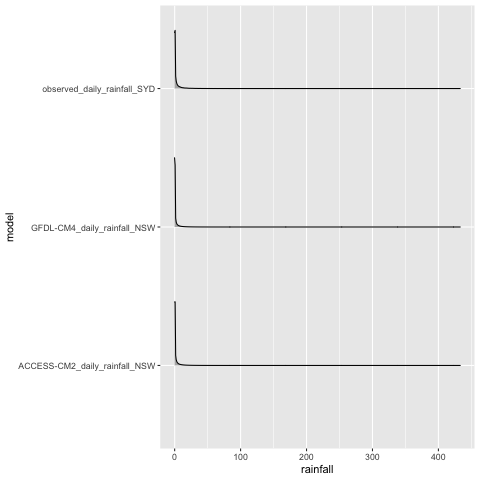

In [104]:
%%R

library(ggridges)

ggplot(df_boxplot, aes(x = rainfall, y = model)) + 
geom_density_ridges(scale = 0.5)

In [110]:
%%R

df_ridge <- final %>% mutate(month = month(time))

df_ridge

# A tibble: 15,653 x 4
   time       model                       rainfall month
   <date>     <chr>                          <dbl> <dbl>
 1 2014-01-01 observed_daily_rainfall_SYD  0.00661     1
 2 2014-01-02 observed_daily_rainfall_SYD  0.0301      1
 3 2014-01-03 observed_daily_rainfall_SYD  0.640       1
 4 2014-01-04 observed_daily_rainfall_SYD  0.0147      1
 5 2014-01-05 observed_daily_rainfall_SYD  0.128       1
 6 2014-01-06 observed_daily_rainfall_SYD  0.0162      1
 7 2014-01-07 observed_daily_rainfall_SYD  0.447       1
 8 2014-01-08 observed_daily_rainfall_SYD  3.32        1
 9 2014-01-09 observed_daily_rainfall_SYD  0.204       1
10 2014-01-10 observed_daily_rainfall_SYD  0.419       1
# … with 15,643 more rows


R[write to console]: Picking joint bandwidth of 0.196



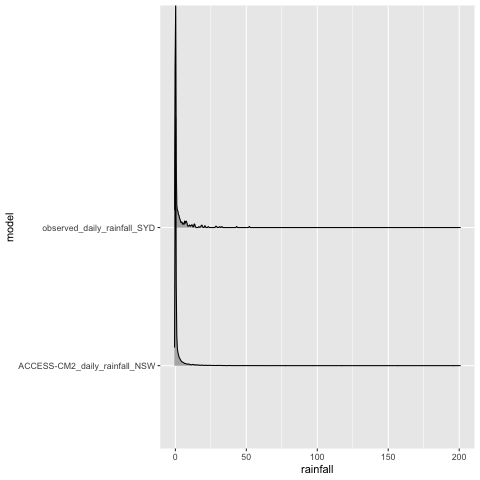

In [123]:
%%R

ggplot(df_ridge, aes(x = rainfall, y = model, group = model)) +
  geom_density_ridges_gradient()
    
https://austinwehrwein.com/data-visualization/it-brings-me-ggjoy/